# Computer vision Introduction using CNN 
# (Convolutional Neural Network)
* CNN should have non linear activations
* tf.keras.layers.ConvXD where X:
  - 1 = 1D text based
  - 2 = 2D Images
  - 3 = 3D Videos


## Imports

In [ ]:
import pathlib
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import zipfile
import os 

## Lets now get the data
We will only be using the pizza and steak part of the food101 dataset

In [ ]:
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2021-10-26 15:04:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 142.250.103.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   164MB/s    in 0.6s    

2021-10-26 15:04:59 (164 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [ ]:
# Time to unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# View files
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


## Visualizing the Data

In [ ]:
# Lets traverse through pizza steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  #print(f" There are {len(dirnames)} Directories and {len(filenames)} images in {dirpath}.")
  if len(dirnames) < 1:
    print(f"There are {len(filenames)} images in {dirpath}.")
  elif  len(filenames) <= 1:
    print(f"There are {len(dirnames)} Directories in {dirpath}.")

There are 2 Directories in pizza_steak.
There are 2 Directories in pizza_steak/train.
There are 750 images in pizza_steak/train/pizza.
There are 750 images in pizza_steak/train/steak.
There are 2 Directories in pizza_steak/test.
There are 250 images in pizza_steak/test/pizza.
There are 250 images in pizza_steak/test/steak.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))
num_pizza_images_test

250

In [ ]:
# Lets get the classnames 
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))

class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

### Visualize our images

In [ ]:
def view_random_image(target_dir,target_class):
  """
  INFO:Gets a random image from a selected directory and class
  """
  target_folder = target_dir + "/" +  target_class
  random_image = random.sample(os.listdir(target_folder),1)
  # Plot out the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f" Image shape: {img.shape}") # Shows the shape of the image

  return img

 Image shape: (384, 512, 3)


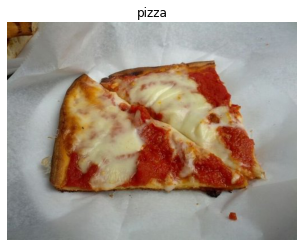

In [ ]:
# View a random image
img = view_random_image(target_dir = "pizza_steak/train",
                        target_class = "pizza")

## Lets try to slowly build a CNN (convoluted neural network)

In [ ]:
# Set up random seed
tf.random.set_seed(42)

# Preprocces data (get all images between 0 and 1 , callded normalization or scaling )
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32,
                                               seed = 42)


test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32,
                                             seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build a CNN model same as Tiny VGG on the cnn explainer site

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding = "valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 ,activation= "sigmoid")
])

In [ ]:
# TIme to compile our model
model_1.compile(optimizer= tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps =  len(test_data))

Epoch 1/5
47/47 [==============================] - 43s 254ms/step - loss: 0.5576 - accuracy: 0.7107 - val_loss: 0.4034 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4227 - accuracy: 0.8013 - val_loss: 0.3917 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4066 - accuracy: 0.8120 - val_loss: 0.3285 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3695 - accuracy: 0.8420 - val_loss: 0.3078 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 12s 246ms/step - loss: 0.3235 - accuracy: 0.8647 - val_loss: 0.3253 - val_accuracy: 0.8600


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 163ms/step - loss: 0.3253 - accuracy: 0.8600


[0.3252759575843811, 0.8600000143051147]

In [ ]:
model_1.evaluate(train_data)

47/47 [==============================] - 8s 167ms/step - loss: 0.3157 - accuracy: 0.8687


[0.31574738025665283, 0.8686666488647461]

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Create model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid"),

])

# COmpile the model
model_2.compile(optimizer= tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"])


# Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps =  len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 0.9690 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 2s 152ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931551098823547, 0.5]

In [ ]:
model_2.evaluate(train_data)

47/47 [==============================] - 7s 155ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931551694869995, 0.5]

### Lets try to improve model 2 by adding an extra layer and more hidden connections


In [ ]:
# Model 3

# Setup random seed
tf.random.set_seed(42)

# Build model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(126,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])


# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 220ms/step - loss: 4.1300 - accuracy: 0.6040 - val_loss: 6.0189 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 1.8252 - accuracy: 0.6827 - val_loss: 1.5023 - val_accuracy: 0.5640
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.8968 - accuracy: 0.6913 - val_loss: 0.7063 - val_accuracy: 0.7160
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.7720 - accuracy: 0.7147 - val_loss: 0.4730 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.5218 - accuracy: 0.7800 - val_loss: 0.4321 - val_accuracy: 0.7940


In [ ]:
model_3.evaluate(test_data)

16/16 [==============================] - 3s 154ms/step - loss: 0.4321 - accuracy: 0.7940


[0.43211209774017334, 0.7940000295639038]

In [ ]:
model_3.evaluate(train_data)

47/47 [==============================] - 7s 156ms/step - loss: 0.3669 - accuracy: 0.8480


[0.3669021427631378, 0.8479999899864197]

## Lets view our model summaries

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 126)               18966654  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               12700     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 18,985,883
Trainable params: 18,985,883
Non-trainable params: 0
_________________________________________________________________


## Notice how the model 1 (CNN) only has 31k parameters while model 3 has over 18m parameters and yet it still not delivers the same performance.

# Steps we took

1. Become one with the data (visualize it)
2. Preprocess the data, prepare it for model training (scaling/normalizing and turning into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameters and improve our model 
7. Repeat until satisfied 

## 1.  Become one with the data

 Image shape: (512, 512, 3)
 Image shape: (384, 512, 3)


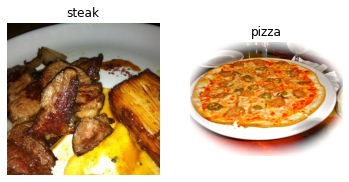

In [ ]:
# Visualize Data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train","pizza")

## 2. Preporcess the data

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [ ]:
# Turn data into batches using test data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Load in our image data from directories 
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode ="binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images,labels = train_data.next() # Get the net batch of images / labels in train data
len(images),len(labels)

(32, 32)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.],
      dtype=float32)

## 3. Create a CNN model

start with a baseline. A baseline is a simple model or an existing one that you set up when beginning a machine learning experiment and then as you keep experimenting you try to beat

In [ ]:
# Lets try to make the model creating a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential


# Create the baseline model

baseline_model = Sequential([
      Conv2D(filters = 10,
             kernel_size = 3,
             strides = 1,
             padding = "valid",
             activation="relu",
             input_shape = (224,224,3)), # Specify shape in input layer
      Conv2D(10,3,activation="relu"),
      Conv2D(10,3,activation="relu"),
      Flatten(),
      Dense(1,activation="sigmoid")         # Output layer
])